## California House Pricing Dataset

In [16]:
# =========== IMPORT LIBRARIES ===========
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geopandas.tools as gplt
import geopandas.plotting as gplt

In [17]:
# =========== READ DATA ===========
df = pd.read_csv('data/housing.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [33]:
# Summary statistics by category (ocean proximity) for target variable
df.groupby('ocean_proximity')['median_house_value'].describe()

,count,mean,std,min,25%,50%,75%,max
ocean_proximity,,,,,,,,
<1H OCEAN,9136.0,240084.285464,106124.292213,17500.0,164100.0,214850.0,289100.0,500001.0
INLAND,6551.0,124805.392001,70007.908494,14999.0,77500.0,108500.0,148950.0,500001.0
ISLAND,5.0,380440.000000,80559.561816,287500.0,300000.0,414700.0,450000.0,450000.0
NEAR BAY,2290.0,259212.311790,122818.537064,22500.0,162500.0,233800.0,345700.0,500001.0
NEAR OCEAN,2658.0,249433.977427,122477.145927,22500.0,150000.0,229450.0,322750.0,500001.0


In [21]:
# Let's show all columns with missing data as well
df[df.isnull().any(axis=1)] # any missing data in columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


# Data Imputation

- We can note that we have a number of features with some missing data, but not too many instances overall (207/20640);

- Let's try an *Unsupervised Learning* approach based on the kNN model, we can use the function below and pass a dataframe to generated an imputed dataframe

In [22]:
# =========== DATA IMPUTATION | KNN UNSUPERVISED LEARNING IMPUTATION ===========
def impute_knn(df):
    ''' 
    Inputs: pandas DataFrame containing the feature matrix 
    Outputs: DataFrame with NaN values imputed using KNN
    '''
    
    # Separate the dataframe into numerical and categorical columns
    ldf = df.select_dtypes(include=[np.number])           # Select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # Select categorical columns in df
    print('---------')
    print("Numerical columns:\n", ldf.columns.tolist())
    print()
    print("Categorical columns:\n", ldf_putaside.columns.tolist())
    print()
    
    # Define columns with and without missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()     # Columns with NaN values
    cols_no_nan = ldf.columns.difference(cols_nan).tolist()  # Columns without NaN values
    print("Columns with NaN values:", cols_nan)
    print()
    print("Columns without NaN values:", cols_no_nan)
    print()
    
    for col in cols_nan:
        imp_test = ldf[ldf[col].isna()]   # Rows with missing data in the current/target column
        imp_train = ldf.dropna(subset=[col])  # Rows with no missing data in the current/target column
        print("--------------")
        print(f"Processing column: {col}")
        print("Rows with missing values (imp_test):\n", imp_test)
        print()
        print("Rows without missing values (imp_train):\n", imp_train)
        print()
        
        # Use KNeighborsRegressor to impute missing values
        model = KNeighborsRegressor(n_neighbors=5)
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[ldf[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
        print(f"Imputed values for column {col}:\n", ldf[col])
    
    # Concatenate the imputed numerical columns and the untouched categorical columns
    return pd.concat([ldf, ldf_putaside], axis=1)

In [23]:
# Call function that imputes missing data
df2 = impute_knn(df)

---------
Numerical columns:
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

Categorical columns:
 ['ocean_proximity']

Columns with NaN values: ['total_bedrooms']

Columns without NaN values: ['households', 'housing_median_age', 'latitude', 'longitude', 'median_house_value', 'median_income', 'population', 'total_rooms']

--------------
Processing column: total_bedrooms
Rows with missing values (imp_test):
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          

In [24]:
# looks like we have a full feature matrix, non-null count 20640 for all columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Exploratory Data Analysis

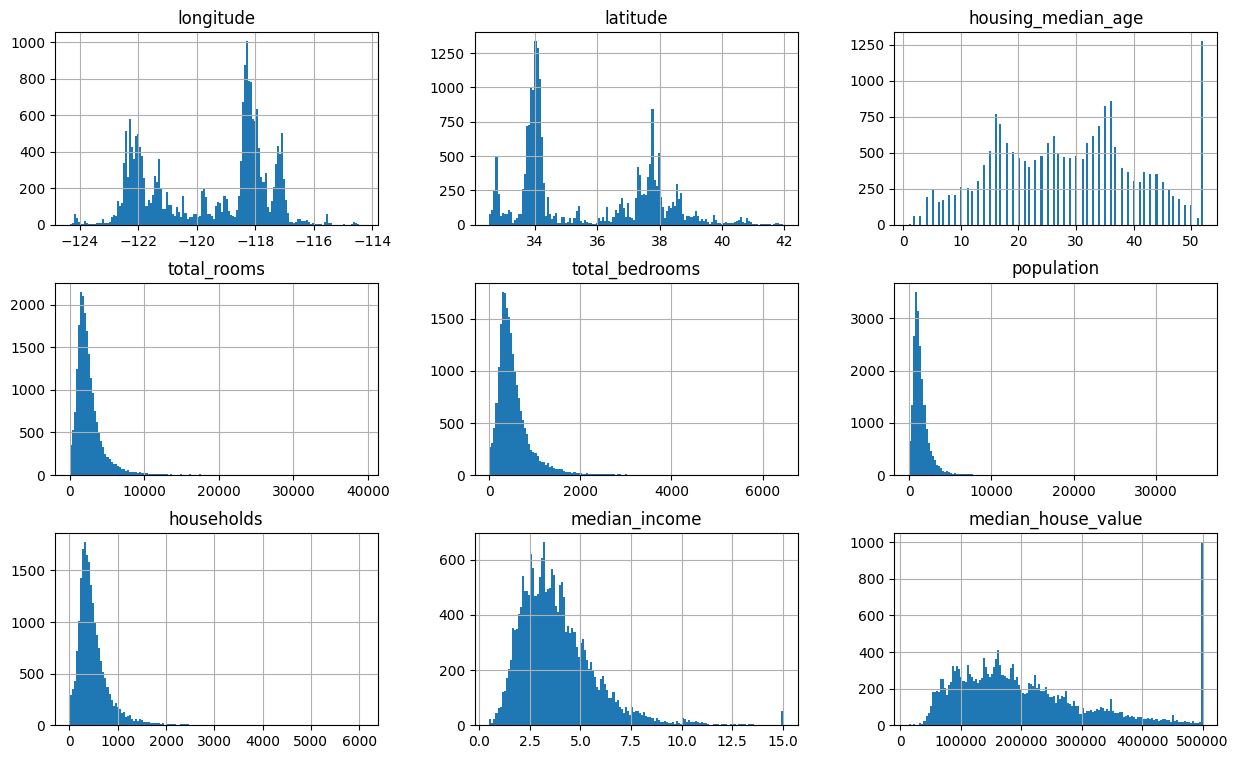

In [25]:
# =========== UNIVARIATE HISTOGRAMS ===========
# Look up for data distributions, outliers, scales
size_bins = int(np.sqrt(len(df2)))
df2.hist(bins=size_bins, figsize=(15,9))
plt.show()

**Odd Patterns & Outliers**

Data distributions which slightly sticks out:

- `housing_median_age` is one possible feature that exhibits outliers, with a particularly noticeable peak at its maximum value.

- Feature `median_house_value` has an odd peak at its maximum value (around 500k), which could be an outlier.

**Less Noticeable Outliers**

- We have quite a few skewed (less centralised) data distributions, 6 features have such distributions.

- The range of the x axis for some of these features is quite broad (eg. population), indicating we have quite a few outliers, but unlike the first two, we can apply transformation to features and attempt to correct it.

- `households`, `population`, `total_bedrooms` and `total_rooms` represent somewhat connected things, also have similar distribution which is skewed towards smaller values.


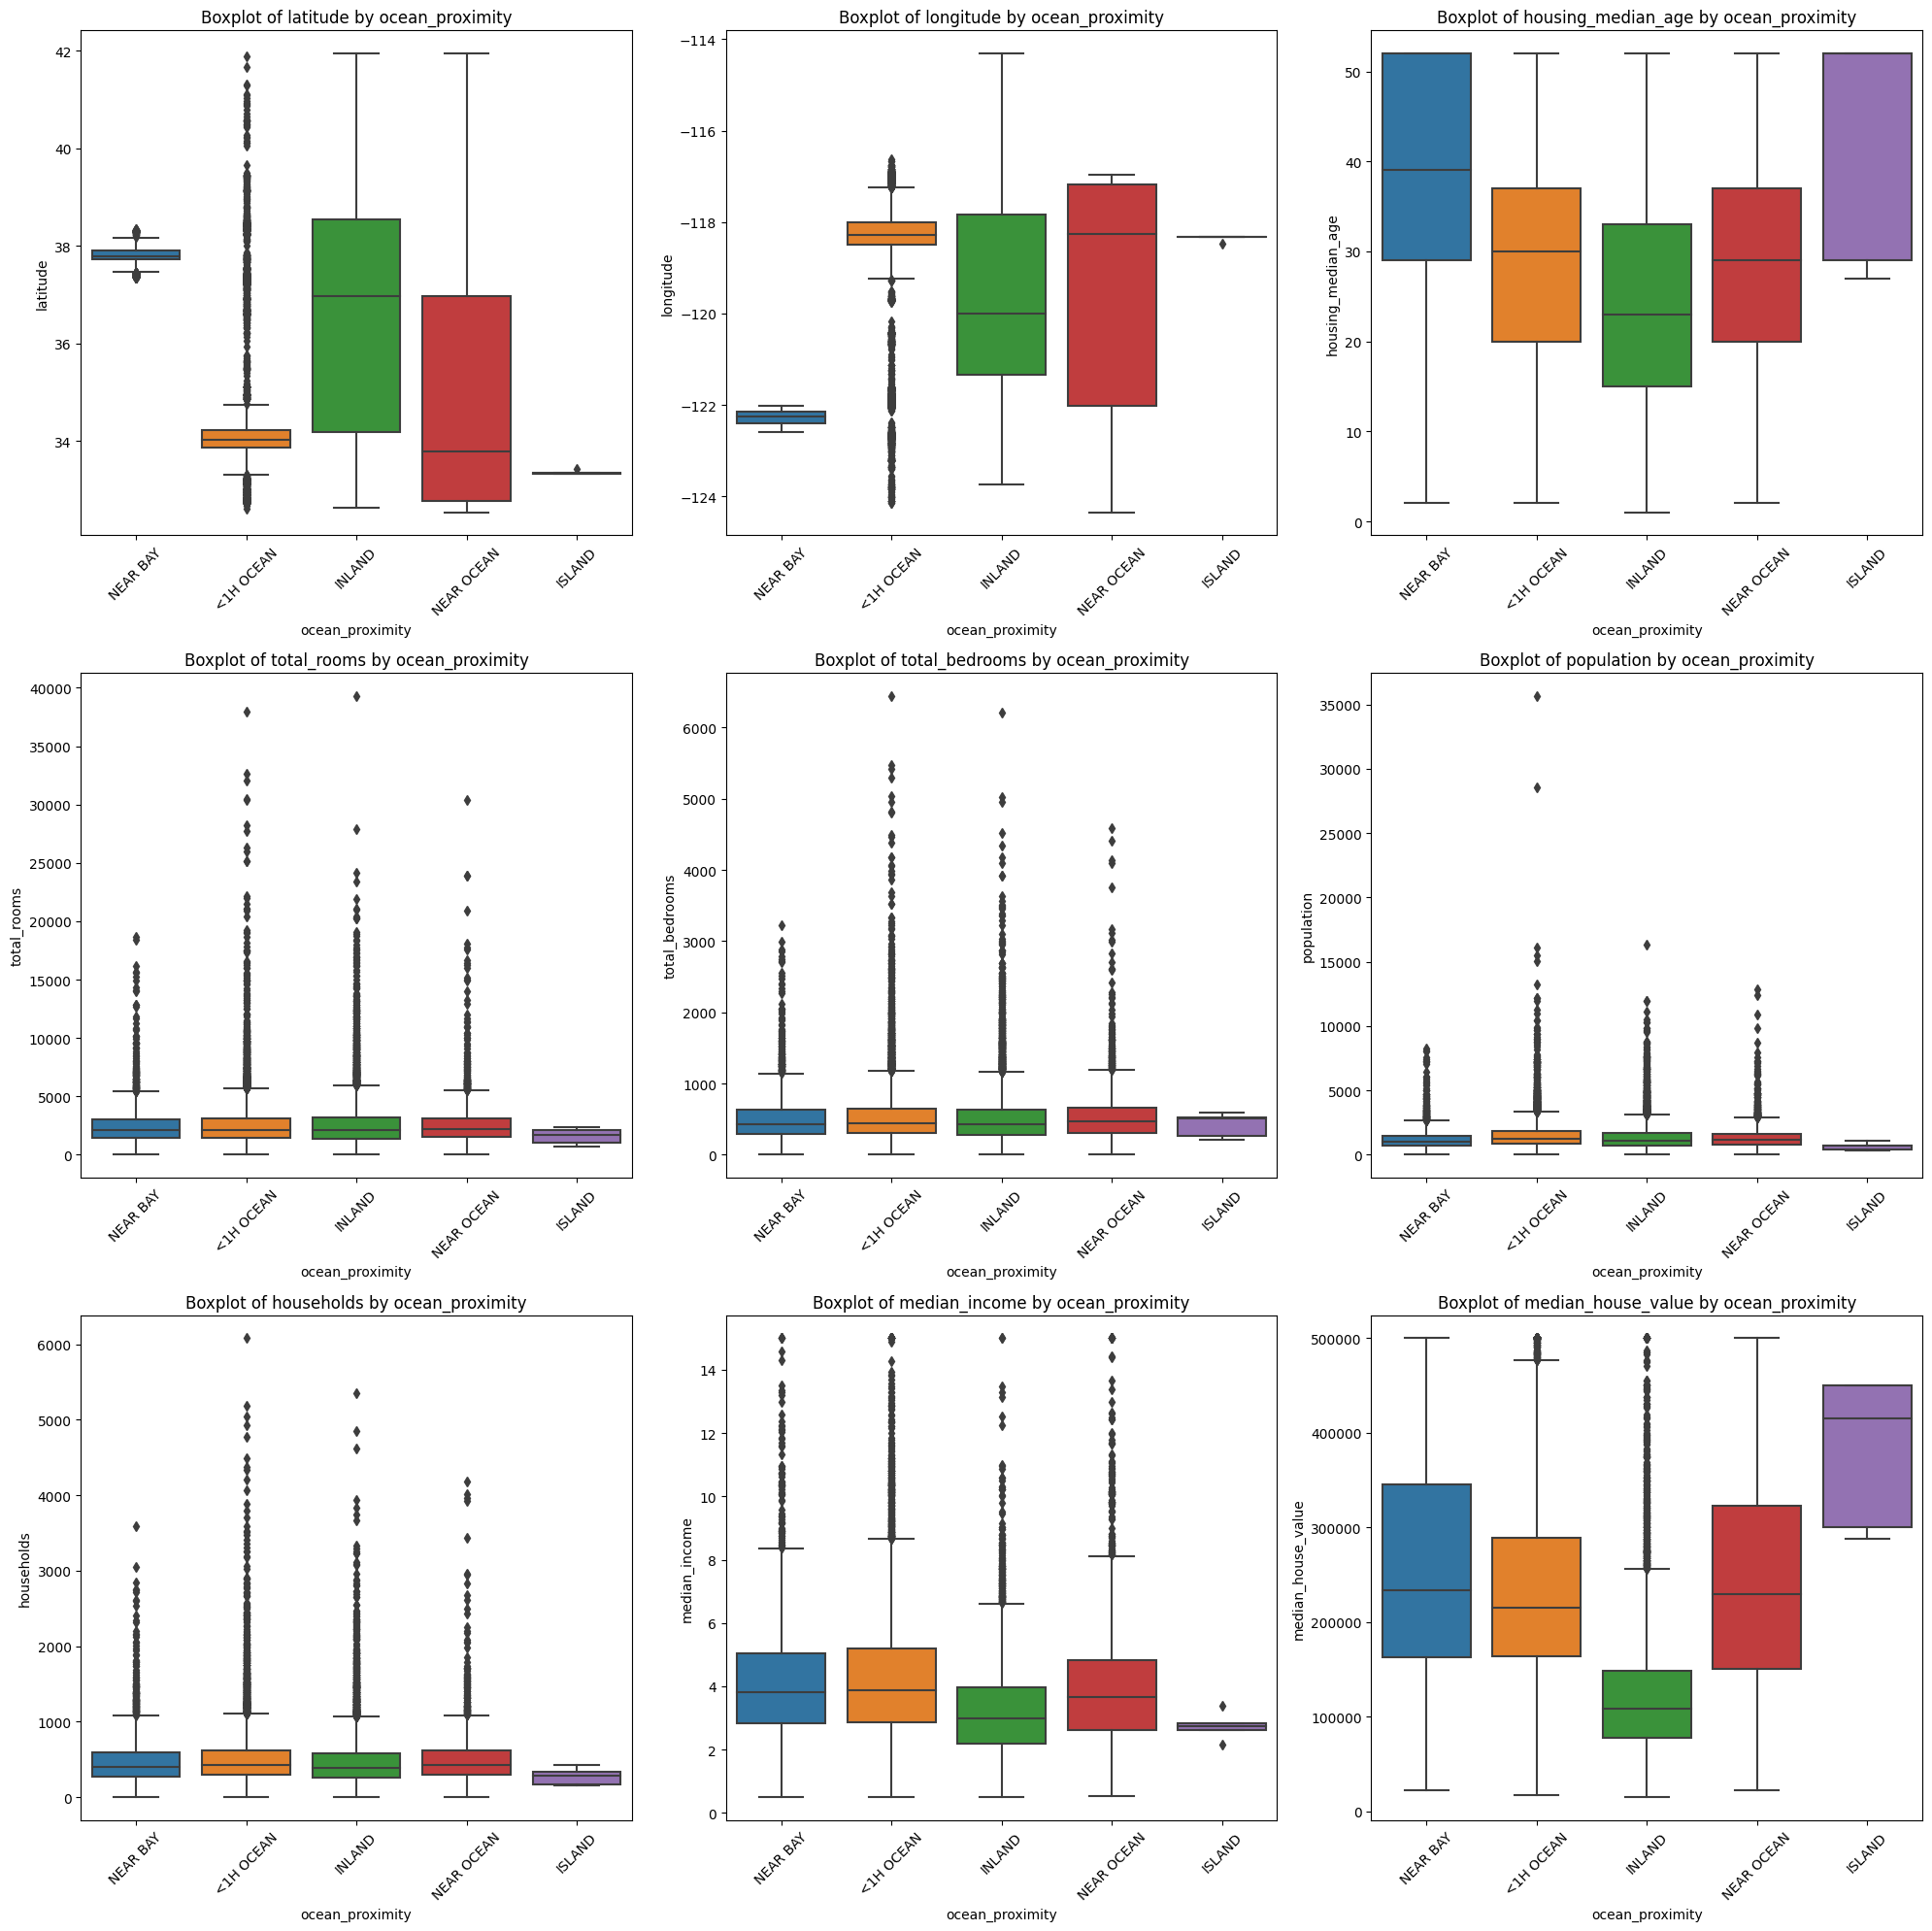

In [57]:
# =========== BOXPLOTS - CATEGORICAL VARIABLE ANALYSIS ===========
numerical_vars = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Define the number of rows and columns for the grid layout
num_rows = 3
num_cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over numerical variables
for i, var in enumerate(numerical_vars):
    # Plot each variable's boxplot in the corresponding subplot
    sns.boxplot(x='ocean_proximity', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var} by ocean_proximity')
    axes[i].set_ylabel(var)
    axes[i].set_xlabel('ocean_proximity')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(numerical_vars), num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

c:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

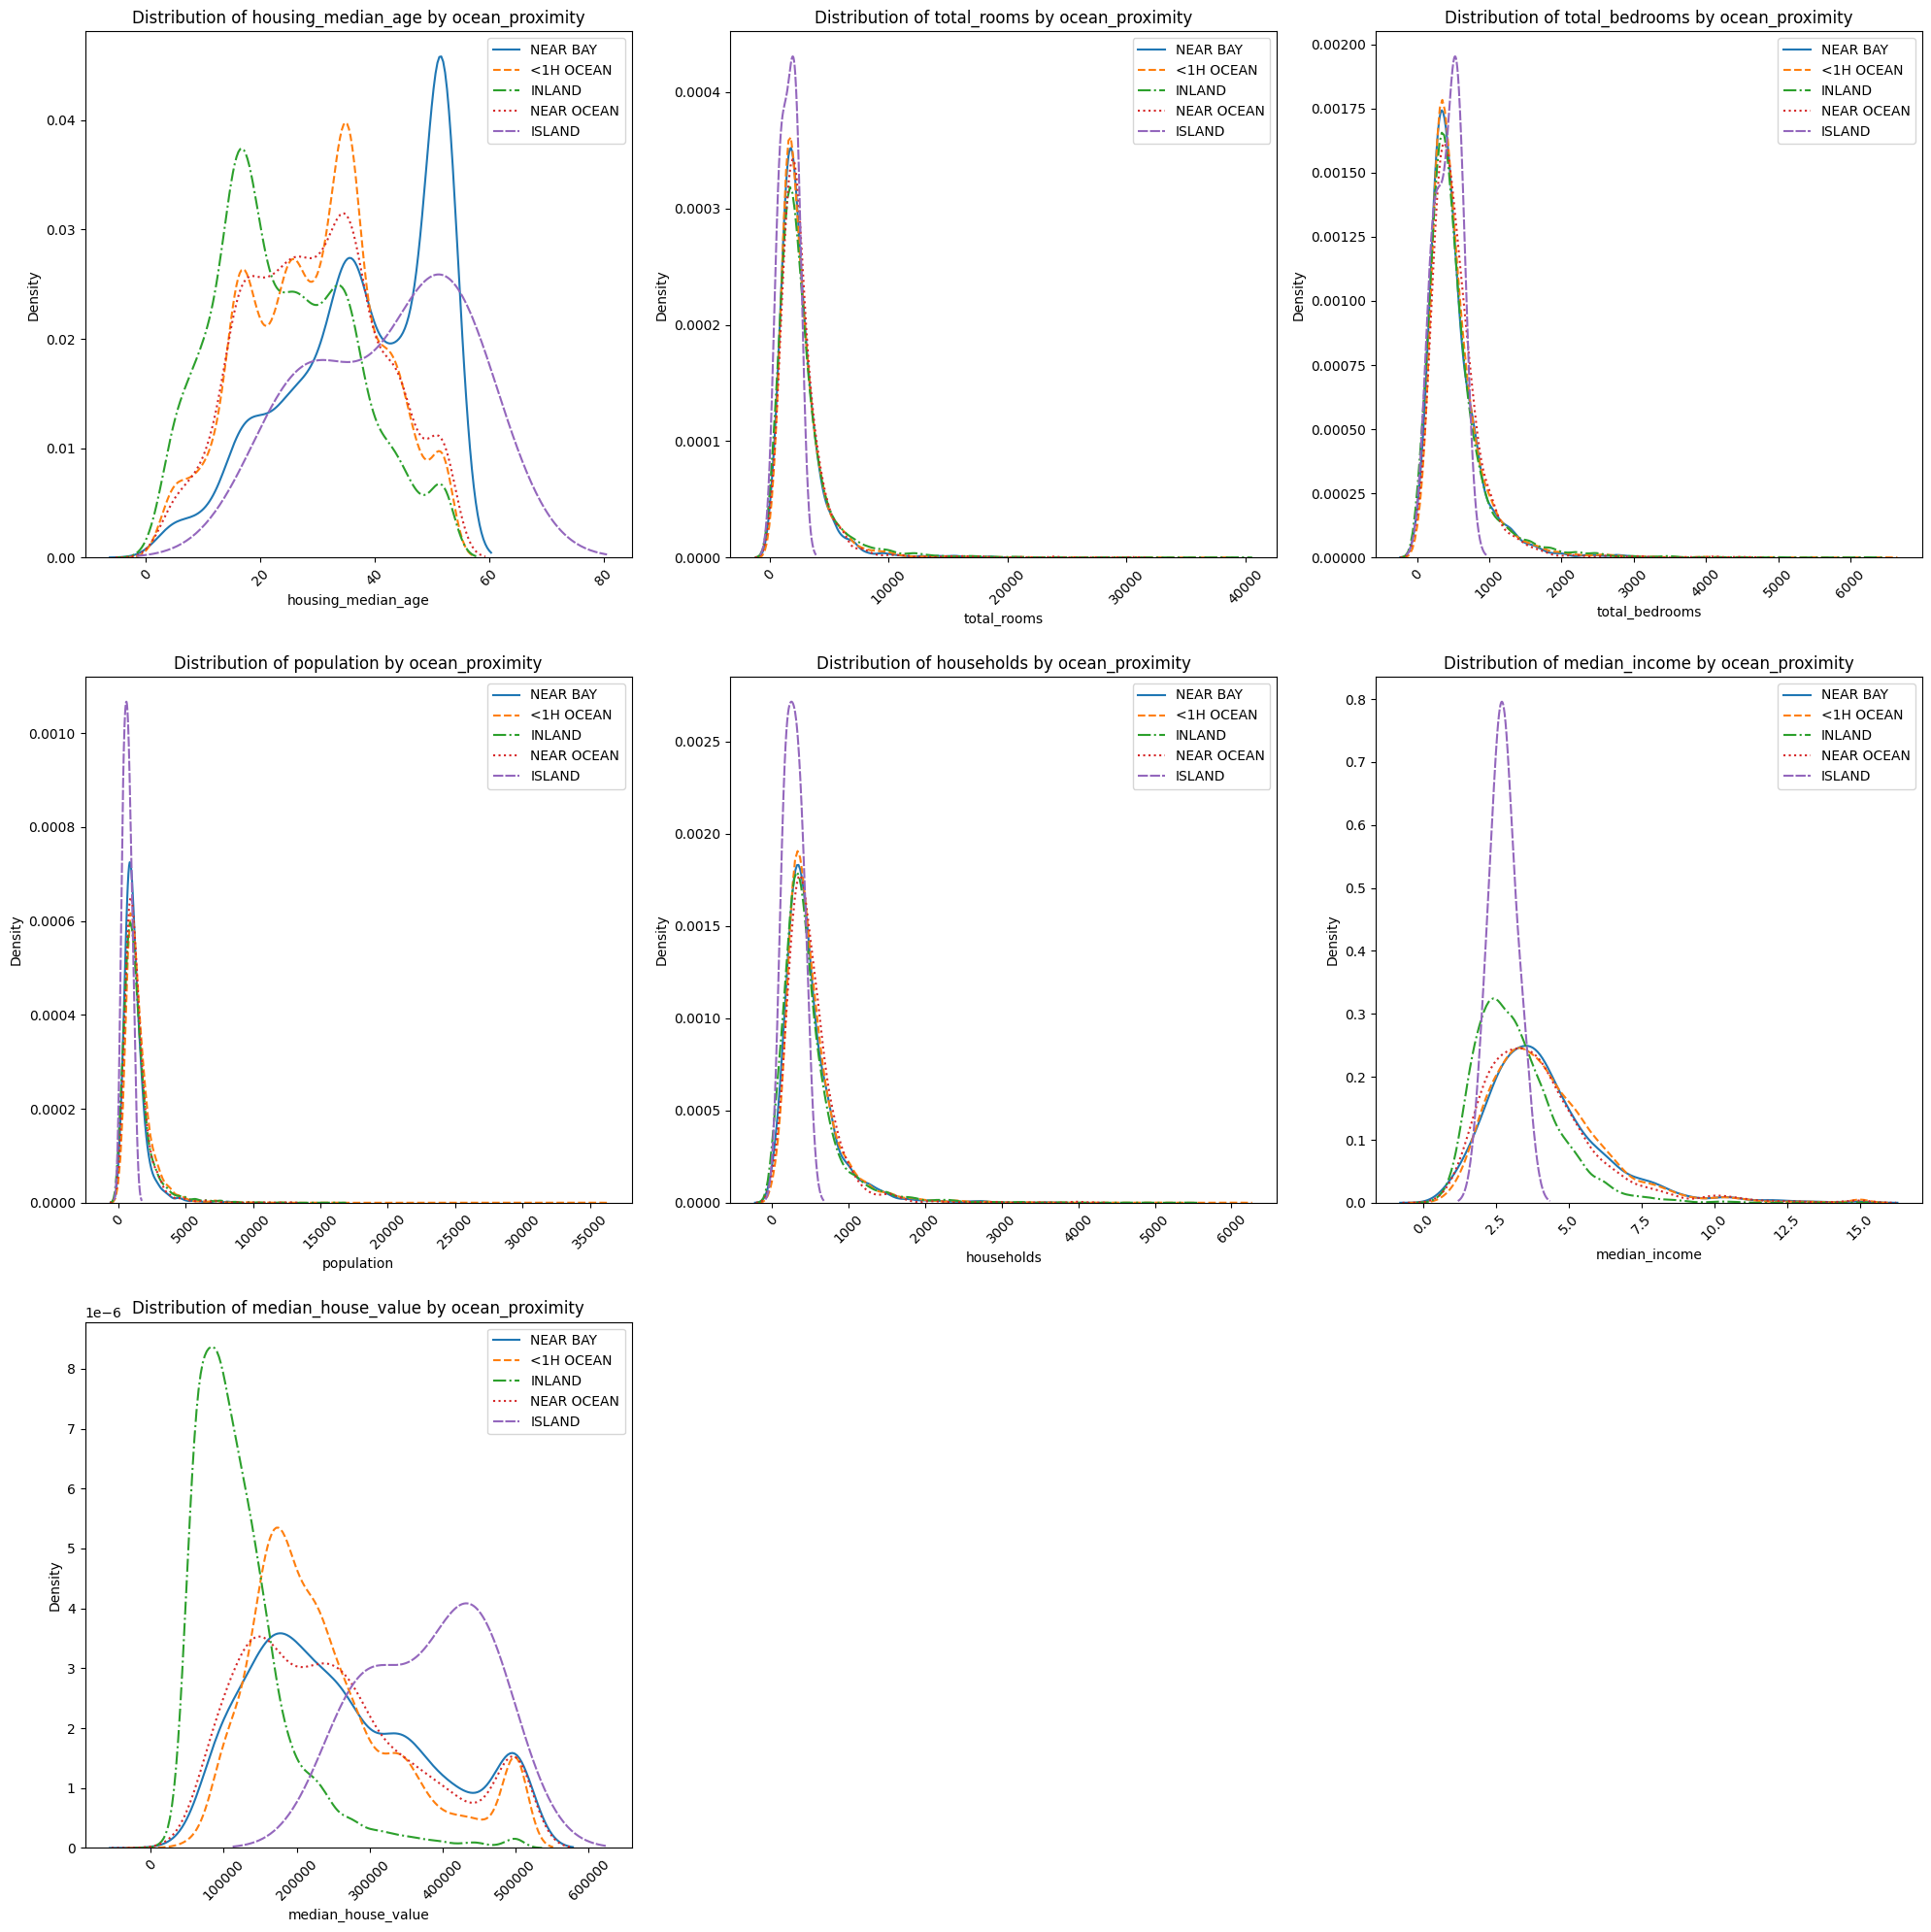

In [64]:
# =========== KDE PLOTS - CATEGORICAL VARIABLE ANALYSIS ===========
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical variables
numerical_vars = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Define the number of rows and columns for the grid layout
num_rows = 3
num_cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Define different line styles
line_styles = ['-', '--', '-.', ':', (0, (5, 1))]  # Different line styles

# Iterate over numerical variables
for i, var in enumerate(numerical_vars):
    # Plot each variable's distribution in the corresponding subplot
    for j, category in enumerate(df['ocean_proximity'].unique()):
        sns.kdeplot(df[df['ocean_proximity'] == category][var], 
                    label=category, 
                    ax=axes[i], 
                    linestyle=line_styles[j % len(line_styles)])  # Use line styles
    axes[i].set_title(f'Distribution of {var} by ocean_proximity')
    axes[i].set_ylabel('Density')
    axes[i].set_xlabel(var)
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(numerical_vars), num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


- The distributions of the different `ocean_proximity` categories show a clear distinction when plotted against `housing_median_age`, `median_income`, `median_house_value`. The box plots show variations in these variables across different types of proximity to the ocean. For instance, coastal properties seem to have higher median house values compared to inland ones.

- In general, it is observed that inland houses tend to have lower values compared to other proximity categories, considering the aforementioned variables.

- Island category in `ocean_proximity` should be considered carefully, since it only contains a minimal number of records (5). Its values may not may not be representative of the entire population of island properties. Therefore, it's advisable to exercise caution when interpreting insights from categories with very few data points.

In [28]:
# =========== BIVARIATE CORRELATION MATRIX ===========
def corrMat(df, id=False):
    # Select only numerical columns
    df = df.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    corr_mat = df.corr().round(2)
    
    # Create a mask for the upper triangle
    mask = np.zeros_like(corr_mat, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 6))
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, center=0, 
                cmap='plasma', square=True, linewidths=2, annot=True, cbar=False)
    
    # Display the heatmap
    plt.show()

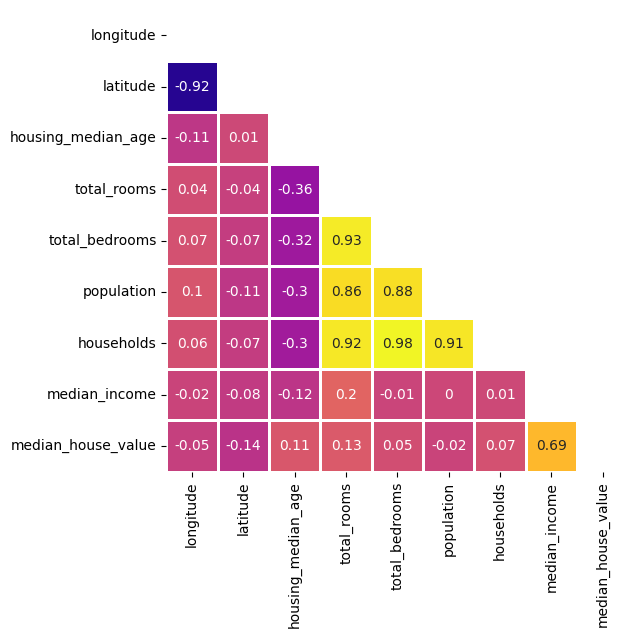

In [29]:
corrMat(df2)

- Target variable `median_house_value` is very mildly correlated to all but one feature here: median_income, so one might outline this as an important feature.

- A correlation of -0.02 & -0.05 (`population`/`longitude`) to the target variable median_house_value might be worth dropping, but they might not be. In fact, a low value isn't exactly a reason to drop a feature. It could simply imply the data is spread quite a lot, which is a strong indicator of nonlinearity.

- Variables `total_rooms`, `households`, `population`, `total_bedrooms` are highly correlated to each other, which may imply that these represent similar things.

In [53]:
# =========== BIVARIATE PAIRGRID W/ KDE DENSITY & SCATTERPLOT ===========
def snsPairGrid(df):

    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_diag(sns.kdeplot, lw=2) # draw kde approximation on the diagonal
    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) # scattered plot on lower half
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10) # kde approximation on lower half
    plt.tight_layout()

c:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

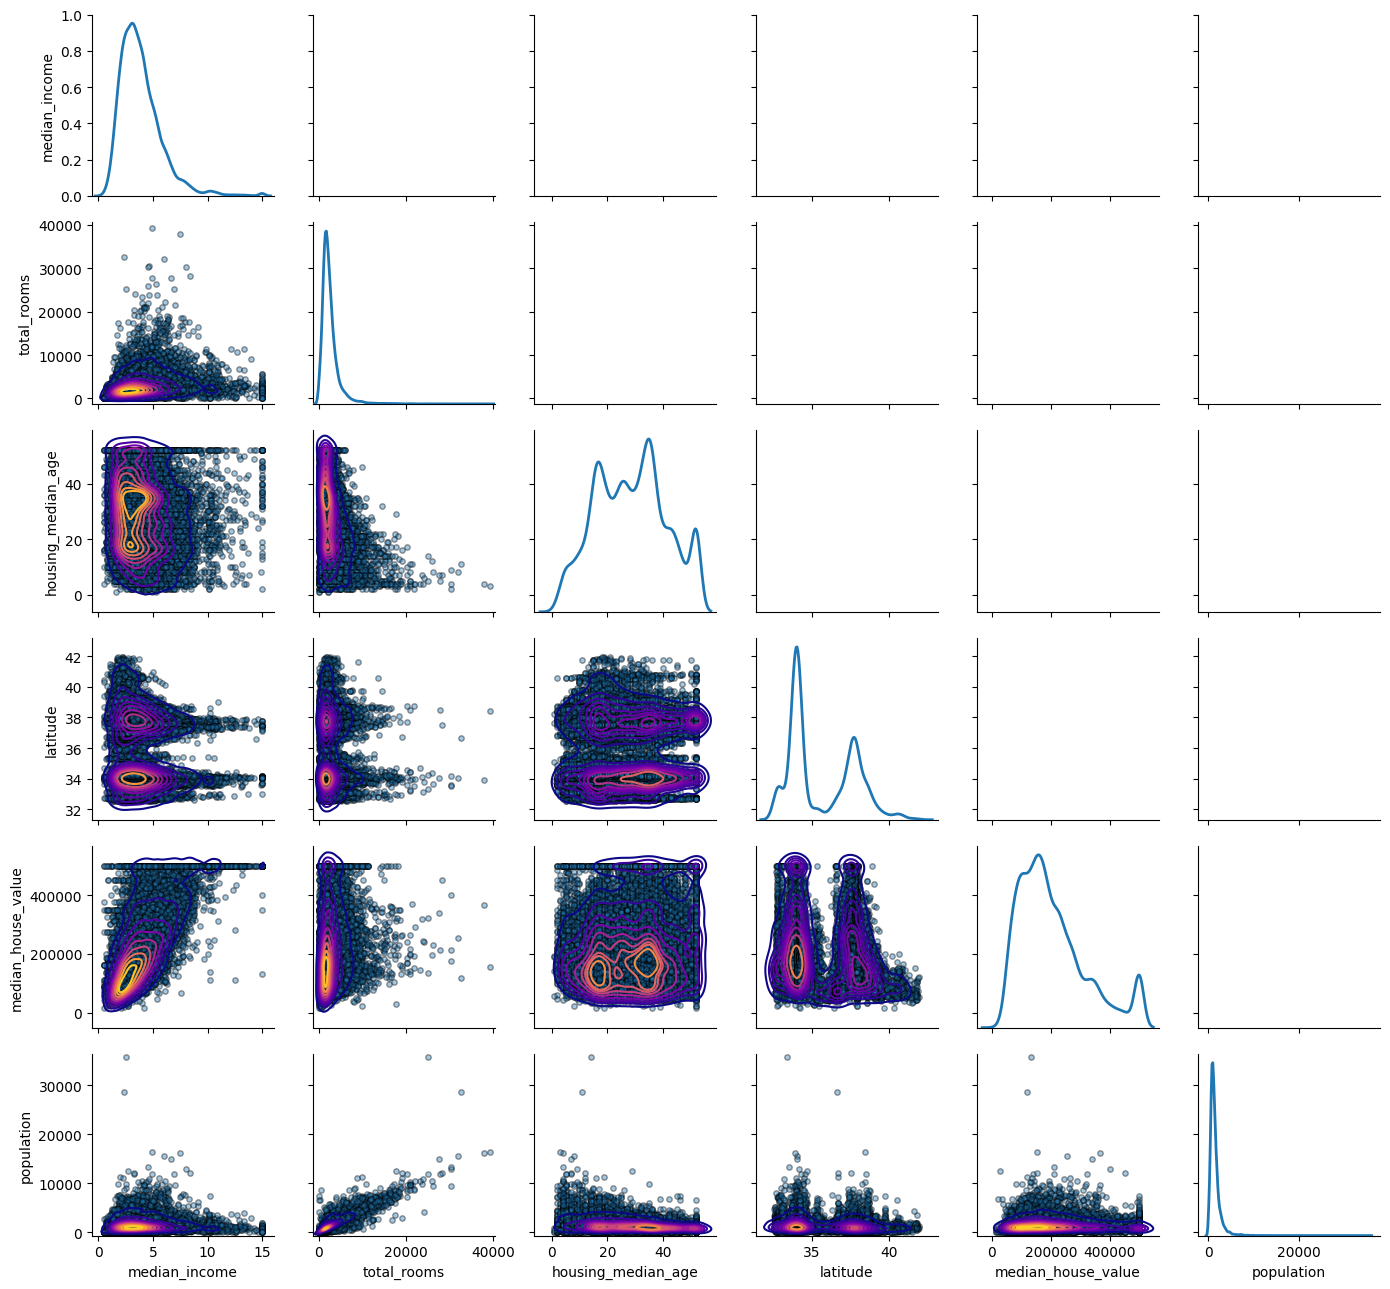

In [54]:
tlist = ['median_income','total_rooms','housing_median_age','latitude','median_house_value','population']
snsPairGrid(df2[tlist]) 

**Relating to target `median_house_value`**

- `median_house_value` and `median_income` relation looks quite linear, with a fair bit of deviation normal to the linear line, we can also note a visible upper limit for all values of `median_income`, which in two dimensions, definitely looks out of place.

- In `median_house_age` vs `median_house_value` relation, it looks like the data is completely spread out all over the place; KDE helping the identification of two peaks roughtly 20 years appart, perhaps these peaks are associated with increasing affordability (given they are concentrated in the lower half).

- We note an additional peak near the peak values of both features as well. The relation is very nonlinear, being scattered everywhere, having data in almost all parts of the graph.

- `median_house_value` & (`total_rooms`,`population`) seem like quite complex features to model, KDE suggests it's heavily concentrated at lower values for the two, with a fair bit at larger values & a lot of data outside the main clusters, classifiable as outliers.
Many of our features have quite different axis scales, higher values might be interpreted as more important, so scaling should definitely be considered.

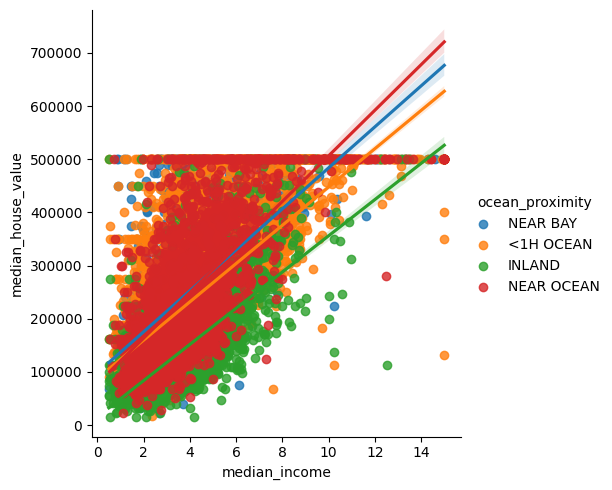

In [58]:
df_filtered = df2[df2['ocean_proximity'] != 'ISLAND']
sns.lmplot(data=df_filtered, x='median_income', y='median_house_value', hue='ocean_proximity')

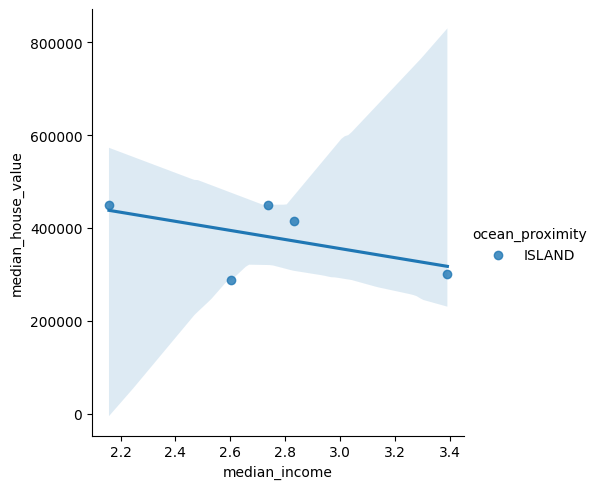

In [59]:
df_filtered = df2[df2['ocean_proximity'] == 'ISLAND']
sns.lmplot(data=df_filtered, x='median_income', y='median_house_value', hue='ocean_proximity')

- After segmenting our data by 'ocean_proximity', we see quite similar positive linear relationships between `median_house_value` and `median_income` within each proximity category.

- In the 'Island' category, this relationship appears less evident, most likely due to the limited amount of data available for that particular category.

In [98]:
# =========== GEOSPATIAL MULTIVARIATE PLOT ===========
def plotTwo(df,lst):
    
    # Load california from module, common for all plots
    cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
    cali = cali.assign(area=cali.geometry.area)
    
    # Create a geopandas geometry feature; input dataframe should contain .longitude, .latitude
    gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))
    proj = gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944) # related to view

    ii=-1
    fig,ax = plt.subplots(1,2,figsize=(21,6),subplot_kw={'projection': proj})
    for i in lst:
        ii+=1
        tgdf = gdf.sort_values(by=i,ascending=True) 
        gplt.polyplot(cali,projection=proj,ax=ax[ii]) # the module already has california 
        gplt.pointplot(tgdf,ax=ax[ii],hue=i,cmap='plasma',legend=True,alpha=1.0,s=3) # 
        ax[ii].set_title(i)
        ax[ii].set_xlabel('Longitude')
        ax[ii].set_ylabel('Latitude')

    plt.tight_layout()
    # Set a positive value for width space adjustment or remove the line
    plt.subplots_adjust(wspace=-0.5)

C:\Users\brand\AppData\Local\Temp\ipykernel_55816\590094661.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cali = cali.assign(area=cali.geometry.area)
C:\Users\brand\AppData\Local\Temp\ipykernel_55816\590094661.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cali = cali.assign(area=cali.geometry.area)


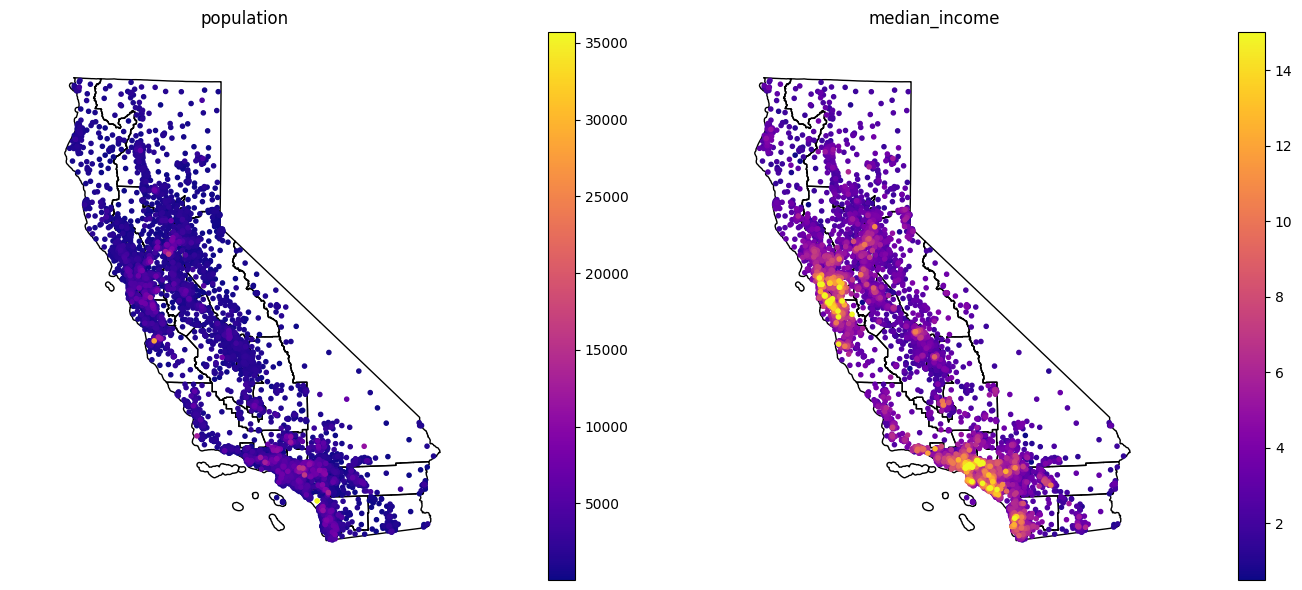

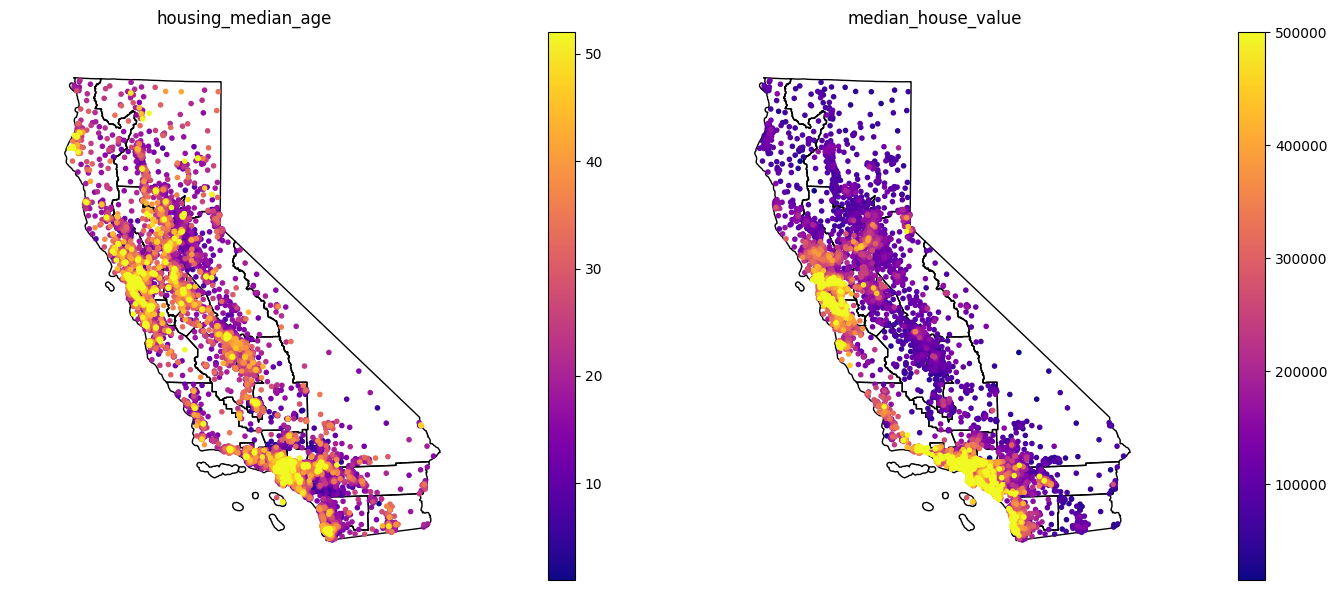

In [99]:
# Call function that plots two geopandas plots 
plotTwo(df2,['population','median_income'])
plotTwo(df2,['housing_median_age','median_house_value'])

- For our target variable, `median_house_value`, just by looking at these graphs, one could immediately note some patterns; the geography location and `median_income` show clear relation; generally increasing the closer you get to the two main clusters, so these two features would probably be important.

- `housing_median_age` for a lot of regions is also strongly correlated to the target variable, but in many regions it isn't (slightly more inland), so its not so clear cut. The relation is probably just nonlinear. Recalling the pairplot, we saw quite a lot of spread in the data, however one could notice two main clusters from that graph, which shows some linearity aspect.

- `population` is a little more tricky, its somewhat correlated, although we have a few outliers (not even visible on the univariate histogram) which make it harder see a relation as the values are more bunched up in the < 10k group, but there does tend to be a relation though, as indicated by the correlation value.

## Reviewing Outliers

**Outlier @ housing_median_age == 52**

We inspected the dataset histogram, and noted a rather odd cluster at a value of 52, 1D data doesn't quite tell the entire story, certainly our histogram data transitions quite steadily, but perhaps during this year it was very affordable. 2D pairplots tend to show this data as being somewhat more like a constraint more than anything, looking very odd compared to the rest of the data (lines in data). Overall, it's not entirely conclusive.

**Outlier @ median_house_value == 500,001**

Unlike `housing_median_age`, it is very doubtful that the outlier spike is not a categorically defined summation of all cases above the maximum `median_house_value`, let's remove this subset, and keep the other.

**Less noticeable outliers**

Having just plotted population in a multivariate plot, we would have noted how the scale created values that are barely visible to the eye, in fact, a model with poorly allocated weights to these outliers can sevely degrade in accuracy.

Let's remove the outlier for median_house_value by simply selecting its maximum value:

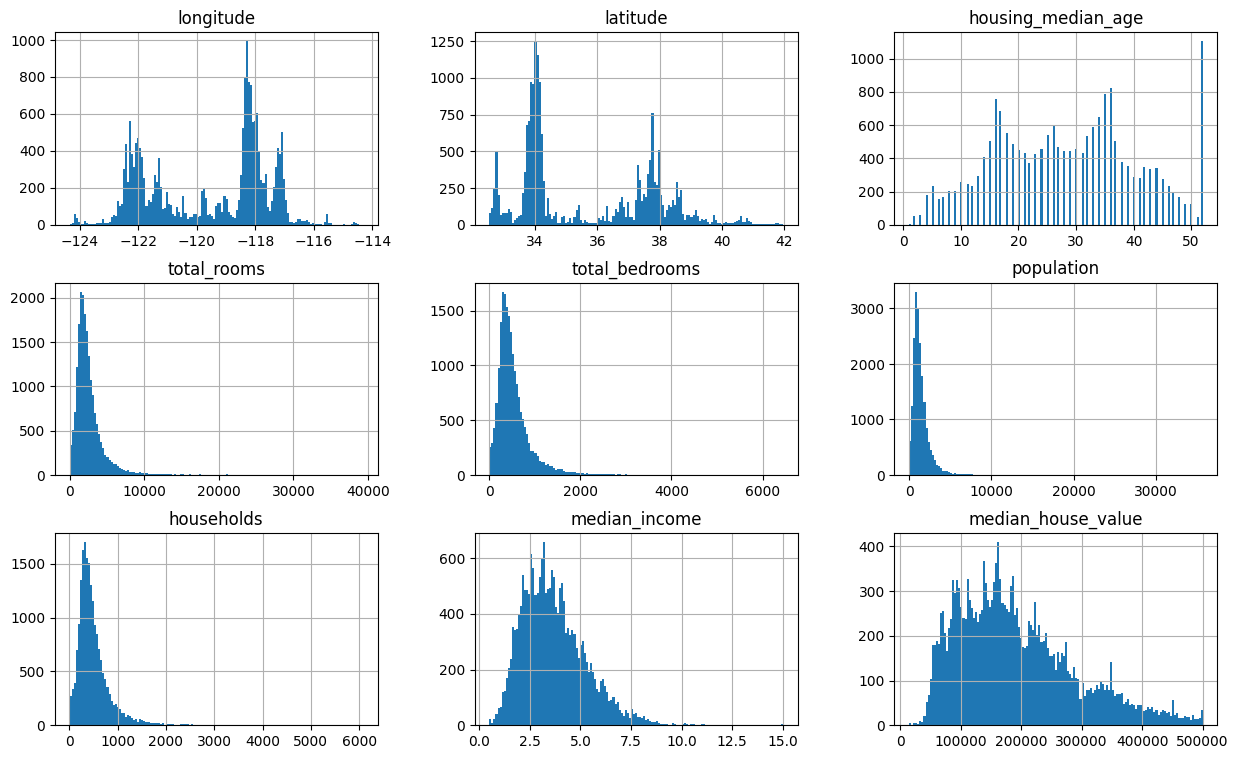

In [46]:
maxval2 = df2['median_house_value'].max() # get the maximum value
df2_upd = df2[df2['median_house_value'] != maxval2] 
df2_upd.hist(bins=size_bins, figsize=(15,9))
plt.show()

Finally, let's just save our processed dataset, so it can be later used in modelling:

In [25]:
df2_upd.to_csv('data/processed_housing.csv')